# Nguyễn Thái Vũ - 1712921

# 0. GIỚI THIỆU
- Trong tình hình hiện nay dịch bệnh Covid đang trở thành một chủ đề nóng cả thế giới và Việt Nam. Trong bài báo cáo lần này ta sẽ cùng thống kê số lượng ca nhiễm bệnh trên toàn thế giới và Việt Nam. Đồng thời dự đoán tình hình dịch bệnh trong tương lai sẽ như thế nào.

# I. LẤY DỮ LIỆU
- Dữ liệu lấy từ chủ đề Covid19 được lấy từ Kaggle và Bộ Y Tế:

https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

https://ncov.moh.gov.vn/web/guest/trang-chu

- Về 2 đường link tham khảo trên Kaggle do Center for Systems Science and Engineering (CSSE) đại học Johns Hopkins public. Danh sách này bao gồm danh sách đầy đủ tất cả các nguồn đã từng được sử dụng trong tập dữ liệu, kể từ ngày 21 tháng 1 năm 2010. Một số nguồn được liệt kê (ví dụ: WHO, ECDC, US CDC, BNO News). Johns Hopkins Github repository: https://github.com/CSSEGISandData/COVID-19
- Về đường link cuối do bộ Y Tế công bố và được cập nhật hằng ngày.

# II. KHÁM PHÁ DỮ LIỆU
Dữ liệu gồm 3 file: "cases_country.csv", "time_series_covid_19_confirmed.csv" và "thong_tin_dich_te_benh_nhan_covid_19_tai_da_nang_1.xls"

### File "cases_country.csv"

In [1]:
import pandas as pd

df_covid19 = pd.read_csv("cases_country.csv", index_col=0)
print(df_covid19.columns)
print("-------------------------")
df_covid19.info()

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')
-------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 14 columns):
Country_Region         188 non-null object
Last_Update            188 non-null object
Lat                    186 non-null float64
Long_                  186 non-null float64
Confirmed              188 non-null float64
Deaths                 188 non-null float64
Recovered              185 non-null float64
Active                 188 non-null float64
Incident_Rate          186 non-null float64
People_Tested          0 non-null float64
People_Hospitalized    0 non-null float64
Mortality_Rate         188 non-null float64
UID                    188 non-null int64
ISO3                   186 non-null object
dtypes: float64(10), int64(1), ob

- Dữ liệu gồn 188 dòng, tương ứng 188 quốc gia. 
- 14 Cột: 
    + Country_Region: tên quốc gia hoặc vùng lãnh thổ. Kiểu dữ liệu string.
    + Last_Update: ngày cập nhật cuối cùng. Định dạng: month/day/year hour:minute
    + Lat, Long_: kinh độ, vĩ độ. Kiểu dữ liệu float64.
    + Confirmed: số lượng ca nhiễm bệnh. Kiểu dữ liệu float64.
    + Deaths: số lượng ca tử vong. Kiểu dữ liệu float64.
    + Recovered: số lượng ca hồi phục. Kiểu dữ liệu float64.
    + Active: số lượng ca đang điều trị. Kiểu dữ liệu float64.
    + Incident_Rate: tỷ lệ lây bệnh. Kiểu dữ liệu float64.
    + People_Tested, People_Hospitalized: không có giá trị.
    + Mortality_Rate: tỷ lệ tử vong. Cách tính = số ca tử vong / số ca nhiễm. Kiểu dữ liệu float64.
    + UID: là mã của quốc gia (numeric code). Kiểu dữ liệu int64.
    + ISO3: là mã của quốc gia (alpha code 3). Kiểu dữ liệu string.
- Có 4 cột bị thiếu: 
    + Lat, Long_: 2 cột dữ liệu này không liên quan đến vấn đề ta đang phân tích, nên sẽ được bỏ qua.
    + Recovered, Incident_Rate: 2 cột dữ liệu bị thiếu. Cách thức điền vào sẽ được trình bày bên dưới.

### File "time_series_covid_19_confirmed.csv"

In [2]:
df_confirm = pd.read_csv("time_series_covid_19_confirmed.csv")
print(df_confirm.columns)
print("----------------------")
df_confirm.info()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/23/20', '7/24/20', '7/25/20', '7/26/20', '7/27/20', '7/28/20',
       '7/29/20', '7/30/20', '7/31/20', '8/1/20'],
      dtype='object', length=197)
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 197 entries, Province/State to 8/1/20
dtypes: float64(2), int64(193), object(2)
memory usage: 409.5+ KB


- Dữ liệu gồm 266 dòng - tương ứng 266 quốc gia.
- Dữ liệu gồm 197 cột:
    + Cột thứ 1 là: tên tỉnh hoặc bang. Kiểu dữ liệu string
    + Cột thứ 2 là: tên quốc gia hoặc vùng lãnh thổ. Kiểu dữ liệu string
    + Cột thứ 3, 4 là: kinh độ, vĩ độ của quốc gia. Kiểu dữ liệu float
    + 196 cột tiếp theo: mỗi cột tương ứng một ngày. Bắt đầu từ 01/24/2020 đến 08/01/2020. Có định dạng month/day/year
- Dữ liệu không có thiếu.

In [3]:
print("Số lượng giá trị NaN trong DataFrame: ", df_confirm.isna().sum().sum())
print("--------------------------------------")
print("Số lượng giá trị NaN trong từng Series: \n", df_confirm.isna().sum())

Số lượng giá trị NaN trong DataFrame:  185
--------------------------------------
Số lượng giá trị NaN trong từng Series: 
 Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
                 ... 
7/3/20              0
7/4/20              0
7/5/20              0
7/6/20              0
7/7/20              0
7/8/20              0
7/9/20              0
7/10/20             0
7/11/20           

- Ta chỉ thấy cột Province/Region có giá trị NaN. Tuy nhiên ta không dùng giá trị này trong quá trình phân tích. Ta có thể bỏ qua.

### File "thong_tin_dich_te_benh_nhan_covid_19_tai_da_nang_1.xls"

In [4]:
df_danang = pd.read_excel("thong_tin_dich_te_benh_nhan_covid_19_tai_da_nang_1.xls")
print(df_danang.columns)
print("----------------------")
df_danang.info()

Index(['bn_so', 'ten', 'thong_tin', 'dia_chi', 'thong_tin_dich_te',
       'nguon_lay', 'lay_cho_nguoi_khac', 'tinh_trang', 'ban_tin',
       'ngay_cong_bo', 'quan_huyen', 'tinh_thanh'],
      dtype='object')
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
bn_so                 325 non-null int64
ten                   325 non-null object
thong_tin             325 non-null object
dia_chi               325 non-null object
thong_tin_dich_te     325 non-null object
nguon_lay             299 non-null object
lay_cho_nguoi_khac    88 non-null object
tinh_trang            325 non-null object
ban_tin               301 non-null float64
ngay_cong_bo          325 non-null datetime64[ns]
quan_huyen            305 non-null object
tinh_thanh            324 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 30.5+ KB


- Dữ liệu gồm 325 dòng. Mỗi dòng tương ứng với 1 bệnh nhân. 
- Dữ liệu gồm 12 cột:
    + bn_so: số thứ tự của bệnh nhân. Kiểu dữ liệu int64.
    + ten: tên bệnh nhân. Kiểu dữ liệu string.
    + thong_tin: thông tin bệnh nhân: tuổi tác và giới tính. Kiểu dữ liệu string.
    + dia_chi: địa chỉ bệnh nhân. Kiểu dữ liệu string.
    + thong_tin_dich_te: mô tả quá trình phát bệnh và nguyên nhân bệnh. Kiểu dữ liệu string.
    + nguon_lay: nguồn lây của bệnh. Kiểu dữ liệu string.
    + lay_cho_nguoi_khác: bệnh nhân có lây cho ai không. Kiểu dữ liệu string.
    + tinh_trang: tình trạng hiện tại: đang điều trị, tử vong, hồi phục. Kiểu dữ liệu string.
    + ban_tin: bản tin số mấy. Kiểu float64
    + ngay_cong_bo: ngày công bố bệnh. Kiếu datetime, định dạng year-month-day.
    + quan_huyen: quận huyện. Kiểu dữ liệu string.
    + tinh_thanh: tỉnh thành. Kiểu dữ liệu string.

# III. Các câu hỏi dự kiến sẽ được khám phá 
1. Thống kê số lượng người nhiễm covid19 và số lượng người tử vong trên toàn thế giới. So sánh Việt Nam và thế giới.
2. Dự đoán số ca nhiễm bệnh trong 14 ngày tiếp theo trên toàn thế giới.
3. Thống kê tình hình covid19 ở Việt Nam.
4. Dự đoán số ca nhiễm trong 10 ngày tiếp theo ở Đà Nẵng. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Đọc dữ liệu từ file csv (index_col=0 để loại bỏ những cột Unnamed (số thứ tự trong file csv))
df_covid19 = pd.read_csv("cases_country.csv", index_col=0)

# 1. THỐNG KÊ SỐ LƯỢNG NGƯỜI NHIỄM COVID VÀ SỐ LƯỢNG NGƯỜI TỬ VONG TRÊN TOÀN THẾ GIỚI:
- Danh sách các quốc gia có số lượng ca nhiễm cao nhất thế giới.
- Danh sách các quốc gia có số lượng ca tử vong cao nhất thế giới.
- So sánh 2 số liệu trên với Việt Nam và cho thấy là Việt Nam ta đã thực hiện việc phòng chống dịch tốt như thế nào.

## 1.1 Xử lý dữ liệu 

In [7]:
# Đổi tên lại các column cho việc thao tác dễ dàng hơn
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})

- "df_covid19" chứa thông tin về dịch bệnh covid trên mỗi quốc gia (số người tử vong, số người nhiễm bệnh, số người hồi phục...), gồm 188 dòng - tương ứng 188 quốc gia.
- Ta sẽ loại bỏ những thuộc tính (cột) không liên quan đến việc ta phân tích:
    + Ta thấy People_Tested và People_Hospitalized không có giá trị => Loại bỏ
    + ISO3: là mã của quốc gia (alpha code 3)- không có ý nghĩa trong việc phân tích hiện tại => loại bỏ
    + UID: là mã của quốc gia (numeric code)- không có ý nghĩa trong việc phân tích hiện tại => loại bỏ
    + Ta dùng tên quốc gia làm index cho DataFrame

In [8]:
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3", 'Lat','Long_','Last_Update'],axis =1)
df_covid19.index = df_covid19['country']
df_covid19 = df_covid19.drop(['country'],axis=1)
df_covid19.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
country,,,,,,
Australia,21713.0,331.0,12391.0,8991.0,85.283801,1.524432
Austria,22106.0,723.0,20010.0,1373.0,245.447682,3.270605
Canada,122053.0,9034.0,108050.0,4970.0,322.416422,7.401703
China,88906.0,4689.0,82247.0,1970.0,6.329287,5.274110
Denmark,15142.0,620.0,13164.0,1358.0,261.420396,4.094571


- Dùng hàm info() của pandas ta thấy có 2 cột dữ liệu ("Recovered" và "Incident_Rate") có dữ liệu bị thiếu. Ta sẽ tìm cách điền vào các dòng bị thiếu.
- "Recovered", có 3 dòng NaN. Đối với cột dữ liệu này, khả năng rất cao là chưa có ca bệnh nào hồi phục. Vì vậy, ta sẽ điều 0 vào các chỗ NaN.
- "Incident_Rate", bản thân em/mình cũng không hiểu tỷ lệ này là gì. cho nên không nhận xét cách điều NaN nào là hợp lý. Nên xin phép không điền vào NaN ở cột này.

In [9]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Australia to Zimbabwe
Data columns (total 6 columns):
Confirmed         188 non-null float64
Deaths            188 non-null float64
Recovered         185 non-null float64
Active            188 non-null float64
Incident_Rate     186 non-null float64
Mortality_Rate    188 non-null float64
dtypes: float64(6)
memory usage: 10.3+ KB


In [10]:
df_covid19["Recovered"] = df_covid19["Recovered"].fillna(0)

## 1.2 Thống kê

- Tính tổng toàn cầu: số lượng người nhiễm (confirm), số lượng người tử vong (death), số lượng người hồi phục (recover) và số lượng người đang điều trị (active).
- Lưu ý: số lượng ca nhiễm toàn cầu sẽ bằng tổng các nước cộng lại (ngoại trừ "Mortality_Rate" - tỷ lệ tử vong) ta không thể tính tổng, mà sẽ tính lại bằng công thức: (tổng số người tử vong) / (tổng số ca nhiễm)
- Về số liệu: số lượng ca nhiễm, số người tử vong, số ca hồi phục, số ca đang điều trị ta hiển thị dạng integer. Đối với tỷ lệ: tỷ suất mắc bệnh-"Incident rate" và tỷ lệ tử vong-"Mortality" ta hiển thị dạng float với 2 ký tự thập phân.

In [11]:
df_global = pd.DataFrame(pd.to_numeric(df_covid19.sum()),dtype=np.float).transpose()
df_global["Mortality Rate"] = np.round(100*df_global["Deaths"]/df_global["Confirmed"],2)
df_global.style.background_gradient(cmap='Wistia',axis=1).format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,Mortality Rate
0,20092855,736254,12350879,6198824,60950.26,569.99,3.66


- Tiếp theo, ta sắp xếp thứ tự các quốc gia dựa theo số lượng ca nhiễm bệnh. 
- Đặc biệt , ta biểu diễn bằng hàm background_gradient (quan sát kỹ, ta sẽ thấy những cột: Deaths, Recoveres, Active, Incident_Rate mặc dù không được sắp xếp theo thứ tự, tuy nhiên, giá trị lớn, nhỏ sẽ có màu đậm, nhạt tương ứng)

In [12]:
df_covid19 = df_covid19.sort_values("Confirmed", ascending= False)
df_covid19.style.background_gradient(cmap="Purples",subset=["Confirmed"])\
                        .background_gradient(cmap="Reds",subset=["Deaths"])\
                        .background_gradient(cmap="YlGn",subset=["Recovered"])\
                        .background_gradient(cmap="Oranges",subset=["Active"])\
                        .background_gradient(cmap="RdPu",subset=["Incident_Rate"])\
                        .background_gradient(cmap="Greens",subset=["Mortality_Rate"])\
                        .format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
country,,,,,,
US,5094565,163465,1670755,2453446,1546.31,3.21
Brazil,3057470,101752,2390830,564888,1438.41,3.33
India,2268675,45257,1583489,639929,164.40,1.99
Russia,890799,14973,695317,180509,610.41,1.68
South Africa,563598,10621,417200,135777,950.28,1.88
Mexico,485836,53003,393160,39673,380.18,10.91
Peru,483133,21276,324020,137837,1465.29,4.40
Colombia,397623,13154,221484,162985,781.45,3.31
Chile,375044,10139,347342,17563,1961.92,2.70


### Bên cạnh đó, từ DataFrame "df_covid19" ta còn có thể rút ra một số thông tin:
- 10 quốc gia có số ca nhiễm Covid19 cao nhất
- 10 quốc gia có số người tử vong cao nhất

<BarContainer object of 11 artists>

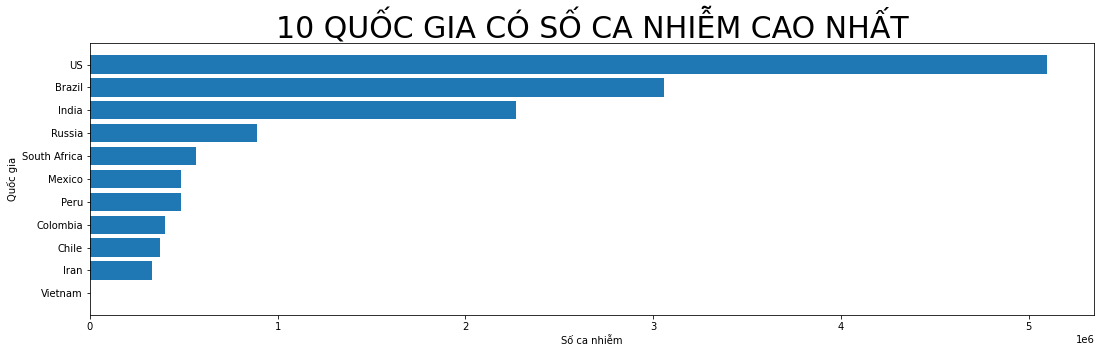

In [13]:
df_covid19.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"], )\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Oranges',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

# Vẽ biểu đồ thể hiện 10 quốc gia có số ca nhiễm cao nhất và so sánh với Việt Nam

df_VietNam_confirm = df_covid19[df_covid19.index == "Vietnam"]['Confirmed'].astype(np.int)
df_top10_country_confirm = df_covid19.sort_values('Confirmed', ascending= False)[:10]['Confirmed'].astype(np.int)
df_top10_country_confirm = pd.concat([df_top10_country_confirm, df_VietNam_confirm])
df_top10_country_confirm

plt.figure(figsize=(18,5))
plt.title("10 QUỐC GIA CÓ SỐ CA NHIỄM CAO NHẤT",fontsize=30)
plt.xlabel("Số ca nhiễm")
plt.ylabel("Quốc gia")
plt.barh(df_top10_country_confirm.index[::-1], df_top10_country_confirm.values[::-1])

- Nhận xét: qua biểu đồ trên, ta thấy so với các nước trên thế giới, Việt Nam chúng ta có số lượng người nhiễm Covid rất thấp (cụ thể là 847 ca) so với những nước như Mỹ (5094565 ca) hoặc Brazil (3057470 ca).

<BarContainer object of 11 artists>

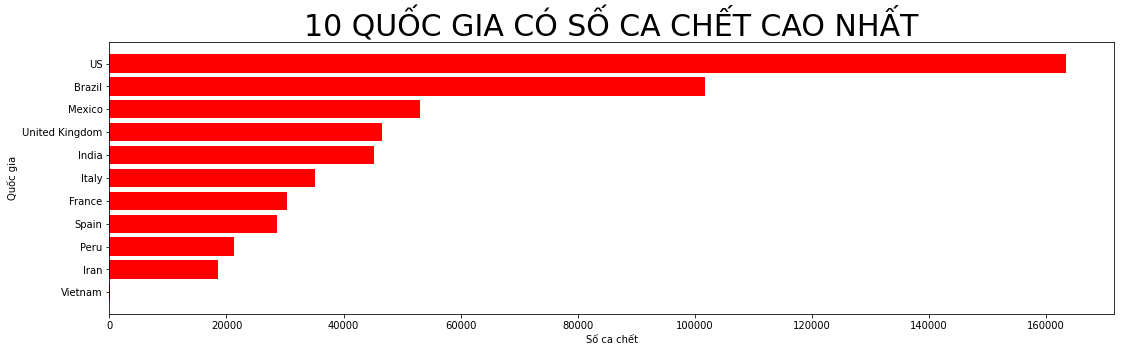

In [14]:
# Vẽ biểu đồ thể hiện 10 quốc gia có số người chết cao nhất và so sánh với Việt Nam

df_VietNam_death = df_covid19[df_covid19.index == "Vietnam"]["Deaths"].astype(np.int)
df_top10_country_death = df_covid19.sort_values('Deaths', ascending= False)[:10]['Deaths'].astype(np.int)
df_top10_country_death = pd.concat([df_top10_country_death, df_VietNam_death])
df_top10_country_death

plt.figure(figsize=(18,5))
plt.title("10 QUỐC GIA CÓ SỐ CA CHẾT CAO NHẤT", fontsize = 30)
plt.xlabel("Số ca chết")
plt.ylabel("Quốc gia")
plt.barh(df_top10_country_death.index[::-1], df_top10_country_death.values[::-1], color="red")

Nhận xét: tương tự, so với các nước trên thế giới, Việt Nam chúng ta có số người mất do Covid rất thấp (15 ca) so với những nước như Mỹ (163465 ca) hoặc Brazil (101752 ca).

# 2. DỰ ĐOÁN SỐ CA NHIỄM BỆNH TRONG 14 NGÀY TIẾP THEO TRÊN TOÀN THẾ GIỚI 
### Tiếp theo ta dùng dữ liệu trong file "time_series_covid_19_confirmed.csv" - thể hiện số người nhiễm trên 267 quốc gia và vùng lãnh thổ từ ngày 22/01/2020 - 01/08/2020

- Đầu tiên, ta tải dữ liệu vào "df_confirm".
- Tương tự như xử lý cho df_covid19, ta đổi tên lại cho thuận tiện

In [15]:
df_confirm = pd.read_csv("time_series_covid_19_confirmed.csv")
df_confirm = df_confirm.rename(columns={"Province/State":"province","Country/Region": "country"})

# 2.1 Thống kê số lượng ca nhiễm trong thời gian qua (trên toàn thế giới)

- Ta thống kê số lượng ca nhiễm bệnh trên toàn thế giới từ ngày 22/01/2020 - 01/08/2020. Để tiện hơn cho việc quan sát, ta xem ngày 22/01 là ngày thứ 0, lần lượt xét tiếp theo 10 ngày (ngày thứ 10, 20, 30,...)
- Biểu đồ:
    + Trục x: ngày (từ 0 - 191)
    + Trục y: số lượng ca nhiễm tương ứng.

In [16]:
list_date = df_confirm.iloc[:,5:].sum(axis =0)
cases = list_date.values
dates = np.arange(0,len(cases[:]))

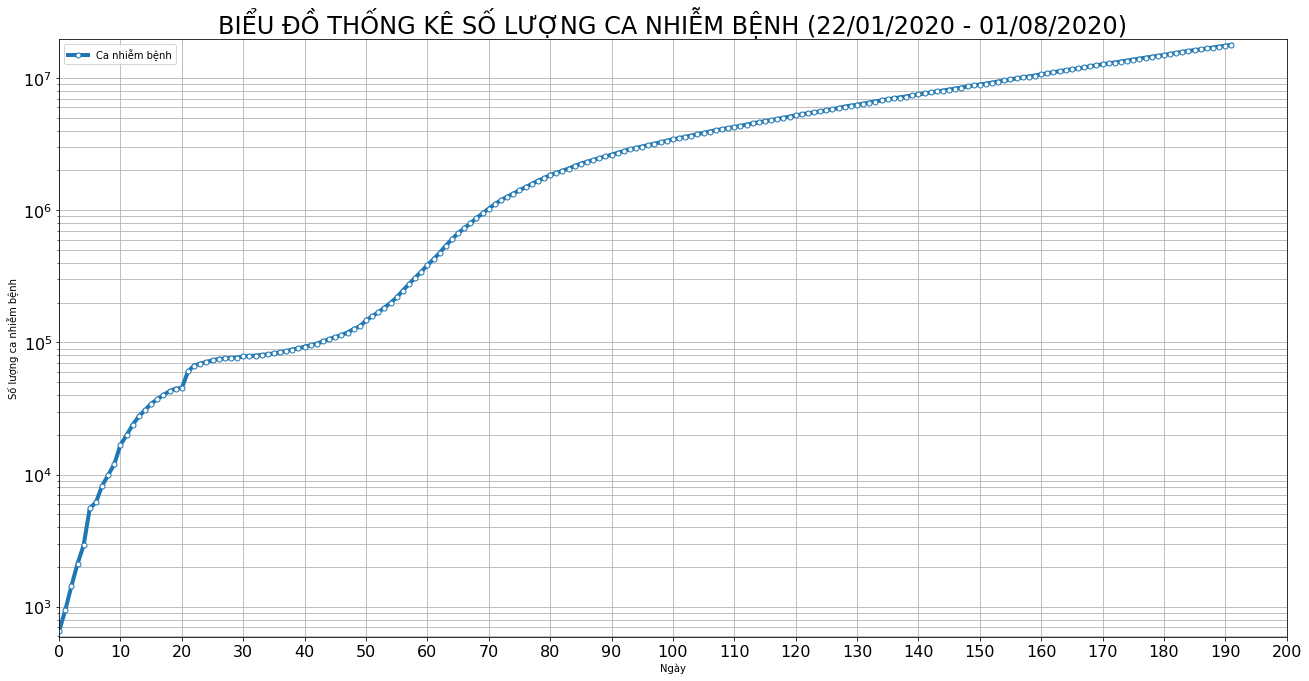

In [17]:
plt.figure(figsize=(22,11))

# marker_style: định nghĩa mục đích vẽ biểu đồ đẹp hơn 
marker_style = dict(linewidth=4, linestyle='-', marker='.',markersize=10, markerfacecolor='#ffffff')
plt.plot(dates, cases,"-.",label="Ca nhiễm bệnh", **marker_style)

# ylim: thêm khoảng trống ở đầu và đuôi, mục đích vẽ biểu đồ đẹp hơn
plt.xlim(dates[0], dates[-1])
plt.ylim(cases.min() - cases.min()/10, cases.max() + cases.max()/10)

# dùng plt.xticks để đánh dấu các vị trí cho trục x
plt.tick_params(labelsize = 16)        
plt.xticks(np.arange(0, len(cases[:]) + 10, 10),[str(i) for i in range(len(cases[:]) + 10)][::10]) 

plt.title("BIỂU ĐỒ THỐNG KÊ SỐ LƯỢNG CA NHIỄM BỆNH (22/01/2020 - 01/08/2020)",fontsize=24)
plt.xlabel("Ngày")
plt.ylabel("Số lượng ca nhiễm bệnh")
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")

## Một số nhận xét: 
- Ta thấy mô hình mô hình có xu hướng tăng và ổn định (đường biểu diễn trơn - smooth). Có khả năng là ta có thể xây dựng mô hình dự đoán. 
- Tuy nhiên, nhìn kỹ hơn ta sẽ thấy 2 vấn đề:
     + Ở phần đầu của mô hình ta thấy dữ liệu có vẻ không được trơn cho lắm, có thể gây nhiễu mô hình của ta khi dự đoán. 
     + Thêm nữa, khoảng dữ liệu của ta quá rộng (những ngày đầu tiên quá thấp - vài trăm hoặc vài nghìn, trong khi những ngày tiếp theo con số rất lớn - vài triệu đến vài chục triệu). Việc các tham số có độ rộng quá lớn sẽ dẫn đến việc mô hình của ta dự đoán không chính xác. 

## Đề xuất cách giải quyết, gồm 2 bước: 
#### 1. Ta bỏ đi những giá trị dưới 100000 (tương ứng là những giá trị trong những ngày đầu tiên).
#### 2. Do đầu ra dự đoán y có độ rộng quá lớn, ta sẽ xử lý bằng cách lấy logarit10(x)

In [18]:
threshold = 100000
list_bool = cases > threshold
cases = cases[list_bool]
datas = dates[list_bool]

In [19]:
train_y = np.log10(cases.astype("float32")).reshape((cases.shape[0], 1))
train_x = np.arange(1, len(train_y) + 1).reshape((train_y.shape[0], 1))

# 2.2 Xây dựng mô hình: 
- Ta xây dựng mô hình học máy để dự đoán số ca nhiễm trong 14 ngày (2 tuần) tiếp theo dựa vào số lượng ca nhiễm trong quá khứ. 
- Mô hình chọn ở đây là Neural Network. Mô hình được xây dựng dựa trên thư viện Keras.

In [20]:
import keras
from keras.layers import Input, Dense, Activation, Dropout, ReLU
from keras.optimizers import Adam
from keras import models
from keras.initializers import glorot_uniform

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## Neural Network:
Input layer --> Hidden layer 1 --> Hidden layer 2 --> Output layer

### Kiến trúc: 
1. Input layer: numpy array có kích thước (1,) (0 tương ứng ngày thứ nhất, 1 tương ứng ngày thứ hai,...)
2. Hidden layer 1: gồm 100 node(unit). Theo sau là hàm kích hoạt ReLU.
3. Hidden layer 2: gồm 50 node(unit). Theo sau là hàm kích hoạt ReLU.
4. Output layer: numpy array có kích thước (1,). Giá trị dự đoán số người nhiễm Covid.

### - Hàm mất mát dùng là "mean squared error": vì đây là bài toán hồi quy.
### - Thuật toán tối ưu dùng là: Adam. Với learning rate = 0.001 
### - Huấn luyện với epochs = 1000
### - Các tham số của Neural Network được khởi tạo bằng glorot_uniform(0) nhằm tránh việc các tham số khởi tạo giống nhau, dẫn đến việc mô hình không thể học được gì.

In [21]:
def model_predict_covid19():
    """
    Hàm số dự đoán số ca nhiễm trong 14 ngày tiếp theo dựa vào số lượng ca nhiễm trong quá khứ
    Input shape: (1,)
    Output shape: (1,) 
    """
    input_model = Input(shape=(1,))
    
    Dense_1 = Dense(100, name="Dense_l1", kernel_initializer= glorot_uniform(0))(input_model)
    ReLU_1 = ReLU(name = "ReLU_1")(Dense_1)

    Dense_2 = Dense(50,name = "Dense_l2", kernel_initializer= glorot_uniform(0))(ReLU_1)
    ReLU_2 = ReLU(name = "ReLU_2")(Dense_2)

    Dense_3 = Dense(10,name = "Dense_l3", kernel_initializer= glorot_uniform(0))(ReLU_2)
    ReLU_3 = ReLU(name = "ReLU_3")(Dense_3)

    Dense_4 = Dense(1,name="Dense_l4", kernel_initializer= glorot_uniform(0))(ReLU_3)
    
    output_model = ReLU(name = "Output")(Dense_4)

    model = models.Model(inputs=input_model, outputs=output_model, name='Covid19_Predict_Comfirm')
    model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['accuracy'])
    
    return model

In [22]:
Covid_model = model_predict_covid19()
Covid_model.summary()

Model: "Covid19_Predict_Comfirm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 100)               200       
_________________________________________________________________
ReLU_1 (ReLU)                (None, 100)               0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 50)                5050      
_________________________________________________________________
ReLU_2 (ReLU)                (None, 50)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 10)                510       
_________________________________________________________________
ReLU_3 (ReLU)                (None, 10)    

In [23]:
EPOCHS = 1000
Covid_model.fit(x=train_x, y=train_y, epochs=EPOCHS)


Epoch 1/1000
149/149 [==============================] - 0s 2ms/step - loss: 22.6807 - accuracy: 0.0000e+00
Epoch 2/1000
149/149 [==============================] - 0s 134us/step - loss: 11.9296 - accuracy: 0.0000e+00
Epoch 3/1000
149/149 [==============================] - 0s 120us/step - loss: 9.5827 - accuracy: 0.0000e+00
Epoch 4/1000
149/149 [==============================] - 0s 127us/step - loss: 8.6125 - accuracy: 0.0000e+00
Epoch 5/1000
149/149 [==============================] - 0s 134us/step - loss: 8.3586 - accuracy: 0.0000e+00
Epoch 6/1000
149/149 [==============================] - 0s 127us/step - loss: 7.9242 - accuracy: 0.0000e+00
Epoch 7/1000
149/149 [==============================] - 0s 134us/step - loss: 7.8754 - accuracy: 0.0000e+00
Epoch 8/1000
149/149 [==============================] - 0s 120us/step - loss: 7.4466 - accuracy: 0.0000e+00
Epoch 9/1000
149/149 [==============================] - 0s 114us/step - loss: 7.6163 - accuracy: 0.0000e+00
Epoch 10/1000
149/149 [====

149/149 [==============================] - 0s 107us/step - loss: 0.1601 - accuracy: 0.0000e+00
Epoch 75/1000
149/149 [==============================] - 0s 114us/step - loss: 0.1776 - accuracy: 0.0000e+00
Epoch 76/1000
149/149 [==============================] - 0s 99us/step - loss: 0.2105 - accuracy: 0.0000e+00
Epoch 77/1000
149/149 [==============================] - 0s 114us/step - loss: 0.1292 - accuracy: 0.0000e+00
Epoch 78/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0663 - accuracy: 0.0000e+00
Epoch 79/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0870 - accuracy: 0.0000e+00
Epoch 80/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0693 - accuracy: 0.0000e+00
Epoch 81/1000
149/149 [==============================] - 0s 121us/step - loss: 0.0514 - accuracy: 0.0000e+00
Epoch 82/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0800 - accuracy: 0.0000e+00
Epoch 83/1000
149/149 [===========

149/149 [==============================] - 0s 109us/step - loss: 0.0451 - accuracy: 0.0000e+00
Epoch 149/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0788 - accuracy: 0.0000e+00
Epoch 150/1000
149/149 [==============================] - 0s 114us/step - loss: 0.1173 - accuracy: 0.0000e+00
Epoch 151/1000
149/149 [==============================] - 0s 95us/step - loss: 0.0584 - accuracy: 0.0000e+00
Epoch 152/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0768 - accuracy: 0.0000e+00
Epoch 153/1000
149/149 [==============================] - 0s 107us/step - loss: 0.2083 - accuracy: 0.0000e+00
Epoch 154/1000
149/149 [==============================] - 0s 114us/step - loss: 0.2078 - accuracy: 0.0000e+00
Epoch 155/1000
149/149 [==============================] - 0s 107us/step - loss: 0.1639 - accuracy: 0.0000e+00
Epoch 156/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0935 - accuracy: 0.0000e+00
Epoch 157/1000
149/149 [==

149/149 [==============================] - 0s 109us/step - loss: 0.0421 - accuracy: 0.0000e+00
Epoch 223/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0357 - accuracy: 0.0000e+00
Epoch 224/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0422 - accuracy: 0.0000e+00
Epoch 225/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0756 - accuracy: 0.0000e+00
Epoch 226/1000
149/149 [==============================] - 0s 107us/step - loss: 0.1251 - accuracy: 0.0000e+00
Epoch 227/1000
149/149 [==============================] - 0s 114us/step - loss: 0.1648 - accuracy: 0.0000e+00
Epoch 228/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0959 - accuracy: 0.0000e+00
Epoch 229/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0625 - accuracy: 0.0000e+00
Epoch 230/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0757 - accuracy: 0.0000e+00
Epoch 231/1000
149/149 [=

149/149 [==============================] - 0s 107us/step - loss: 0.0280 - accuracy: 0.0000e+00
Epoch 297/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0437 - accuracy: 0.0000e+00
Epoch 298/1000
149/149 [==============================] - 0s 110us/step - loss: 0.0636 - accuracy: 0.0000e+00
Epoch 299/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0669 - accuracy: 0.0000e+00
Epoch 300/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0642 - accuracy: 0.0000e+00
Epoch 301/1000
149/149 [==============================] - 0s 107us/step - loss: 0.1558 - accuracy: 0.0000e+00
Epoch 302/1000
149/149 [==============================] - 0s 114us/step - loss: 0.1599 - accuracy: 0.0000e+00
Epoch 303/1000
149/149 [==============================] - 0s 120us/step - loss: 0.1430 - accuracy: 0.0000e+00
Epoch 304/1000
149/149 [==============================] - 0s 107us/step - loss: 0.1049 - accuracy: 0.0000e+00
Epoch 305/1000
149/149 [=

149/149 [==============================] - 0s 115us/step - loss: 0.2643 - accuracy: 0.0000e+00
Epoch 371/1000
149/149 [==============================] - 0s 120us/step - loss: 0.6295 - accuracy: 0.0000e+00
Epoch 372/1000
149/149 [==============================] - 0s 100us/step - loss: 1.2257 - accuracy: 0.0000e+00
Epoch 373/1000
149/149 [==============================] - 0s 100us/step - loss: 0.7004 - accuracy: 0.0000e+00
Epoch 374/1000
149/149 [==============================] - 0s 114us/step - loss: 0.5954 - accuracy: 0.0000e+00
Epoch 375/1000
149/149 [==============================] - 0s 114us/step - loss: 0.4084 - accuracy: 0.0000e+00
Epoch 376/1000
149/149 [==============================] - 0s 107us/step - loss: 0.3445 - accuracy: 0.0000e+00
Epoch 377/1000
149/149 [==============================] - 0s 109us/step - loss: 0.5339 - accuracy: 0.0000e+00
Epoch 378/1000
149/149 [==============================] - 0s 107us/step - loss: 0.3919 - accuracy: 0.0000e+00
Epoch 379/1000
149/149 [=

149/149 [==============================] - 0s 114us/step - loss: 0.0192 - accuracy: 0.0000e+00
Epoch 445/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 446/1000
149/149 [==============================] - 0s 108us/step - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 447/1000
149/149 [==============================] - 0s 111us/step - loss: 0.0151 - accuracy: 0.0000e+00
Epoch 448/1000
149/149 [==============================] - 0s 118us/step - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 449/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 450/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0188 - accuracy: 0.0000e+00
Epoch 451/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0266 - accuracy: 0.0000e+00
Epoch 452/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0288 - accuracy: 0.0000e+00
Epoch 453/1000
149/149 [=

149/149 [==============================] - 0s 120us/step - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 519/1000
149/149 [==============================] - 0s 120us/step - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 520/1000
149/149 [==============================] - 0s 120us/step - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 521/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 522/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 523/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 524/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0098 - accuracy: 0.0000e+00
Epoch 525/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0104 - accuracy: 0.0000e+00
Epoch 526/1000
149/149 [==============================] - 0s 121us/step - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 527/1000
149/149 [=

149/149 [==============================] - 0s 107us/step - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 593/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 594/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0391 - accuracy: 0.0000e+00
Epoch 595/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0641 - accuracy: 0.0000e+00
Epoch 596/1000
149/149 [==============================] - 0s 127us/step - loss: 0.0249 - accuracy: 0.0000e+00
Epoch 597/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0155 - accuracy: 0.0000e+00
Epoch 598/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 599/1000
149/149 [==============================] - 0s 120us/step - loss: 0.0126 - accuracy: 0.0000e+00
Epoch 600/1000
149/149 [==============================] - 0s 121us/step - loss: 0.0214 - accuracy: 0.0000e+00
Epoch 601/1000
149/149 [=

149/149 [==============================] - 0s 100us/step - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 667/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 668/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 669/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 670/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 671/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 672/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0159 - accuracy: 0.0000e+00
Epoch 673/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 674/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0294 - accuracy: 0.0000e+00
Epoch 675/1000
149/149 [=

149/149 [==============================] - 0s 114us/step - loss: 0.0260 - accuracy: 0.0000e+00
Epoch 741/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0208 - accuracy: 0.0000e+00
Epoch 742/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 743/1000
149/149 [==============================] - 0s 105us/step - loss: 0.0175 - accuracy: 0.0000e+00
Epoch 744/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0207 - accuracy: 0.0000e+00
Epoch 745/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0385 - accuracy: 0.0000e+00
Epoch 746/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 747/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 748/1000
149/149 [==============================] - 0s 103us/step - loss: 0.0171 - accuracy: 0.0000e+00
Epoch 749/1000
149/149 [=

149/149 [==============================] - 0s 107us/step - loss: 0.0134 - accuracy: 0.0000e+00
Epoch 815/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0104 - accuracy: 0.0000e+00
Epoch 816/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0301 - accuracy: 0.0000e+00
Epoch 817/1000
149/149 [==============================] - 0s 101us/step - loss: 0.0294 - accuracy: 0.0000e+00
Epoch 818/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 819/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 820/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 821/1000
149/149 [==============================] - 0s 111us/step - loss: 0.0214 - accuracy: 0.0000e+00
Epoch 822/1000
149/149 [==============================] - 0s 114us/step - loss: 0.0082 - accuracy: 0.0000e+00
Epoch 823/1000
149/149 [=

149/149 [==============================] - 0s 121us/step - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 889/1000
149/149 [==============================] - 0s 120us/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 890/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 891/1000
149/149 [==============================] - 0s 98us/step - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 892/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 893/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 894/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 895/1000
149/149 [==============================] - 0s 109us/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 896/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 897/1000
149/149 [==

149/149 [==============================] - 0s 122us/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 963/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 964/1000
149/149 [==============================] - 0s 100us/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 965/1000
149/149 [==============================] - 0s 94us/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 966/1000
149/149 [==============================] - 0s 115us/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 967/1000
149/149 [==============================] - 0s 107us/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 968/1000
149/149 [==============================] - 0s 104us/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 969/1000
149/149 [==============================] - 0s 110us/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 970/1000
149/149 [==============================] - 0s 102us/step - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 971/1000
149/149 [==

### Sau khi huấn luyện mô hình xong, ta thực hiện việc dự đoán số người nhiễm Covid19 trong 14 ngày tới.
### Lưu ý: 
1. Do trước khi huấn luyện, ta thực hiện phép tính np.log10() cho nên sau khi tính đầu ra của dữ liệu ta thực hiện ngược lại phép tính log10(x) là pow(10,x)
2. Ta lấy kết quả đầu ra chia cho 100000 cho biểu đồ dễ nhìn hơn.

In [24]:
from datetime import datetime, timedelta, date
from matplotlib import ticker

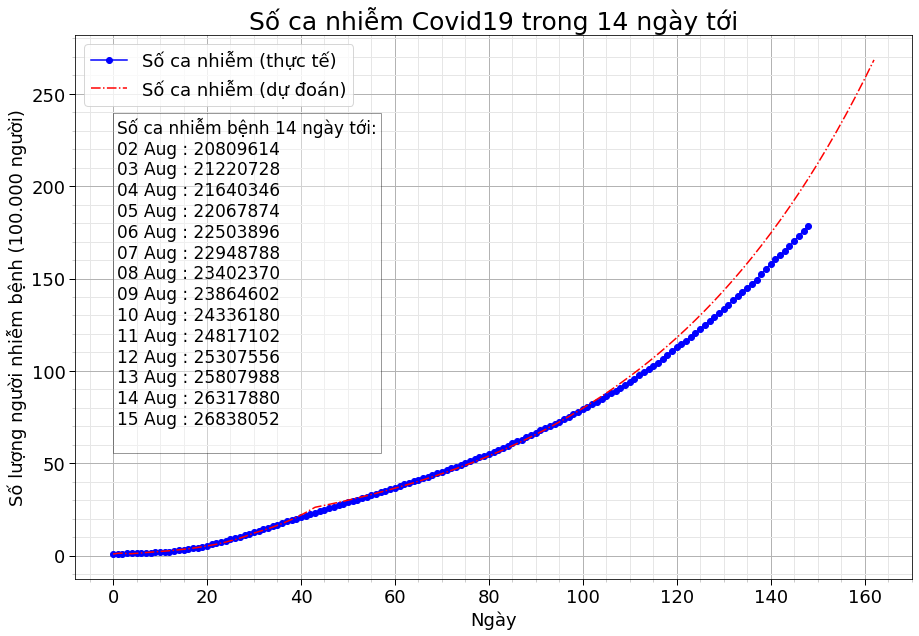

In [25]:
# Vẽ biểu đô thể hiện sự dự đoán

prediction_days = 14

predict_cases = np.power(10, Covid_model.predict(np.arange(1, len(cases) + 14 + 1)))
 
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(cases))

plt.plot(date, cases/100000, "-o", color="blue", label="Số ca nhiễm (thực tế)")

date = np.arange(0,len(predict_cases))

plt.plot(date, predict_cases/100000,"-.",color="red",label="Số ca nhiễm (dự đoán)")

# Đoạn code này dùng để vẽ lên bảng nằm góc trái (Số ca nhiễm bệnh 14 ngày tới)
case_nums_country = df_confirm.groupby("country").sum().drop(["Lat", "Long"],axis =1).apply(lambda x: x[x > 0].count(), axis =0)

position = np.sum(list_bool == False)

d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index][position:]

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Số ca nhiễm bệnh "+str(prediction_days) +" ngày tới:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(int(predict_cases[-1*(prediction_days-i)]))+"\n"
    
plt.text(0.05, 0.85, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

plt.title("Số ca nhiễm Covid19 trong 14 ngày tới",fontsize=25)
plt.xlabel("Ngày", fontsize =18)
plt.ylabel("Số lượng người nhiễm bệnh (100.000 người)",fontsize =18)

plt.legend(fontsize =18)
plt.tick_params(labelsize = 18) 

## Kết luận: ta thấy tình hình dịch bệnh trong 14 ngày tiếp theo ngày càng tăng.

# 3. THỐNG KÊ TÌNH HÌNH COVID19 Ở VIỆT NAM

# 3.1 Lấy dữ liệu từ website và phân tích dữ liệu

- Dùng hàm requests.get() để lấy dữ liệu từ trang chính thức của bộ y tế: "https://ncov.moh.gov.vn/web/guest/trang-chu"
- Dùng BeautifulSoup để lấy các thẻ HTML của trang web (nhằm để lấy các thông tin cần thiết). Ngoài ra có thể dùng hàm prettify() của BeautifulSoup để in ra màn hình các thẻ của trang web (em/mình đã comment lại phần này, nếu muốn xem thầy/cô/bạn vui lòng gỡ comment)

In [26]:
import requests 
from bs4 import BeautifulSoup

In [27]:
URL = "https://ncov.moh.gov.vn/web/guest/trang-chu"
page = requests.get(URL, verify = False) #Lấy data từ trang bộ y tế
soup = BeautifulSoup(page.text, 'html.parser')
#print(soup.prettify())

C:\Users\Admin\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


### Lấy thông tin từ tệp tin HTML
- Sau khi đã có được HTML của trang web, việc tiếp theo ta cần làm là lấy ra những thông tin cần thiết có trong tệp tin HTML. 
- Dữ liệu muốn lấy ở đây là: bảng thống kê bệnh nhân mắc Covid19. Bảng thống kê này nằm ở class "table table-striped table-covid19" và có id "sailorTable". Bạn có thể tìm được điều này bằng nhiều cách (bản thân em/mình dùng cách đầu tiên): 
    + Chọn phần thông tin muốn xem, nhấp chuột phải chọn Inspect.
    + Tự đọc tệp tin HTML và tìm ra phần muốn tìm.
    + Dùng các công cụ hỗ trợ (vd: SelectorGadget,...)
- Thông tin nằm trong thẻ <td>. Sau khi đã lấy được thông tin, ta viết 1 đoạn script nhỏ để trích xuất ra DataFrame để xử lý

In [28]:
#Tìm đến phần tử Bảng thống kê bệnh nhân id:sailortable
df_VietNam_covid = soup.find_all('table', attrs={"class":"table table-striped table-covid19", "id":"sailorTable"})
# Thông tin nằm trong thẻ <td>
result_list = df_VietNam_covid[0].find_all('td')

In [29]:
# Hàm ghi data thu được đưa vào bảng
def location_extract (result_list):
    data =pd.DataFrame()
    col_names = ['Location','Infected','Treating','Recovered','Dead']
    for i in range (0,5):
        data.insert (i, col_names[i],[m.get_text() for m in result_list[i::5]])
    return data

df_provinces = location_extract(result_list)
df_provinces.head(10)

,Location,Infected,Treating,Recovered,Dead
0,Đà Nẵng,392,186,178,26
1,Hà Nội,156,11,145,0
2,Quảng Nam,101,80,18,3
3,Hồ Chí Minh,78,13,65,0
4,Bà Rịa - Vũng Tàu,37,10,27,0
5,Thái Bình,31,0,31,0
6,Bạc Liêu,27,2,25,0
7,Hải Dương,23,18,5,0
8,Ninh Bình,23,1,22,0
9,Vĩnh Phúc,19,0,19,0


- Số tỉnh thành có người nhiễm Covid19:

In [30]:
print("Số tỉnh thành có người nhiễm Covid19: ", len(df_provinces))

Số tỉnh thành có người nhiễm Covid19:  40


- Làm rõ số liệu: mặc dù có 40 tỉnh có người nhiễm Covid19, nhưng thật ra có trường hợp (ví dụ tỉnh Bến Tre: chỉ có 1 ca bệnh và đã chữa khỏi) thì tại thời điểm hiện tại ta xem như Bến Tre không có dịch.

In [31]:
treating = df_provinces["Treating"].values.astype(np.int)
print("Số tỉnh thành có người nhiễm Covid19: ", len(df_provinces[treating !=0 ]))


Số tỉnh thành có người nhiễm Covid19:  21


# 4. DỰ BÁO COVID19 Ở ĐÀ NẴNG TRONG 14 NGÀY TIẾP THEO

- Qua phần thống kê trên, ta thấy Đà Nẵng là tỉnh có nhiều ca mắc covid19 nhất cũng là tỉnh có nhiều ca tử vong nhất cả nước. Ta sẽ thực việc dự đoán số ca nhiễm Covid19 tại Đà Nẵng trong 10 ngày tiếp theo (15/08/2020 - 24/08/2020).
- Ta đọc dữ liệu trong tệp tin "thong_tin_dich_te_benh_nhan_covid_19_tai_da_nang_1.xls"

# 4.1 Xử lý dữ liệu

In [32]:
df_danang = pd.read_excel("thong_tin_dich_te_benh_nhan_covid_19_tai_da_nang_1.xls")
df_danang.head()

,bn_so,ten,thong_tin,dia_chi,thong_tin_dich_te,nguon_lay,lay_cho_nguoi_khac,tinh_trang,ban_tin,ngay_cong_bo,quan_huyen,tinh_thanh
0,927,Đang cập nhật,"Nữ, 29 tuổi",Đang cập nhật,Đang cập nhật,NaN,NaN,Đang điều trị,NaN,2020-08-14,NaN,Đà Nẵng
1,926,Đang cập nhật,"Nam, 66 tuổi",Đang cập nhật,Đang cập nhật,NaN,NaN,Đang điều trị,NaN,2020-08-14,NaN,Đà Nẵng
2,925,Đang cập nhật,"Nữ, 37 tuổi",Đang cập nhật,Đang cập nhật,NaN,NaN,Đang điều trị,NaN,2020-08-14,NaN,Đà Nẵng
3,924,Đang cập nhật,"Nữ, 37 tuổi",Đang cập nhật,Đang cập nhật,NaN,NaN,Đang điều trị,NaN,2020-08-14,NaN,Đà Nẵng
4,923,Đang cập nhật,"Nam, 28 tuổi",Đang cập nhật,Đang cập nhật,NaN,NaN,Đang điều trị,NaN,2020-08-14,NaN,Đà Nẵng


- Tiếp theo, ta thống kê số ca nhiễm mới cho mỗi ngày

In [33]:
#Thống kê số ca nhiễm mới theo ngày
daily_confirmed_case_increase = pd.DataFrame(data= df_danang.groupby("ngay_cong_bo").size(), columns=["cases_increased"])

- Tiếp theo ta vẽ dữ liệu biểu đồ đường thể hiện số ca nhiễm mỗi ngày tại Đà Nẵng

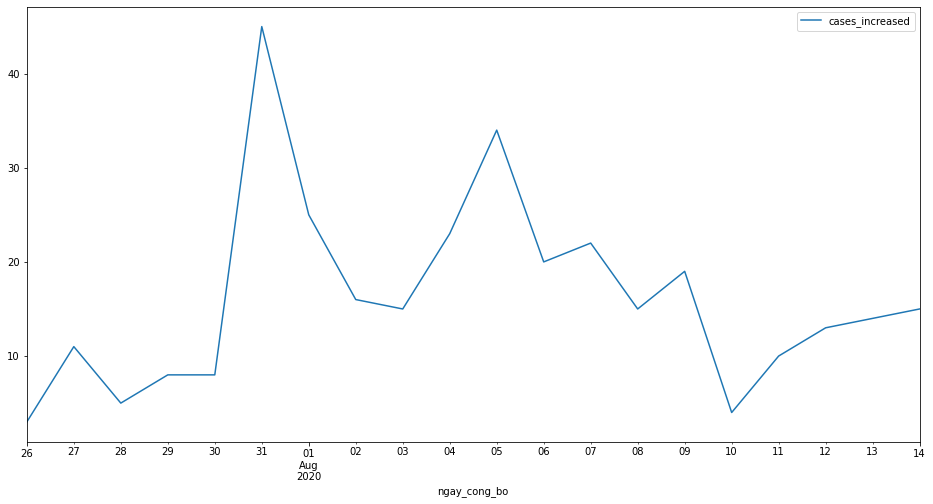

In [34]:
daily_confirmed_case_increase.plot(rot=0, figsize = (16,8)) # Vẽ biểu đồ đường

# 4.2 Phân tích dữ liệu 

### Để có thể phân tích dữ liệu dạng Time series, ta dùng hàm auto_arima thư viện pmdarima.arima
Cài đặt thư viện bằng Anaconda: conda install -c saravji pmdarima

## Về ARIMA:
- Arima là viết tắt của Autoregressive Integrated Moving Averaging. 

In [35]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


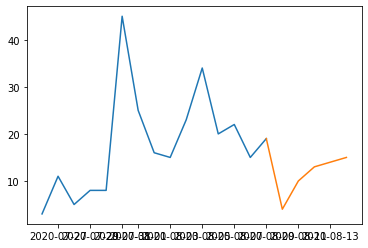

In [36]:
#Tạo tập train và test
train_data = daily_confirmed_case_increase.iloc[: ,0][:15]
test_data = daily_confirmed_case_increase.iloc[: ,0][14:]
plt.plot(train_data)
plt.plot(test_data)

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model = ARIMA(train_data, order=(5,1,0))

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [41]:
fit_model = model.fit(disp=1)

In [42]:
print(fit_model.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.cases_increased   No. Observations:                   14
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -52.418
Method:                       css-mle   S.D. of innovations              9.610
Date:                Fri, 28 Aug 2020   AIC                            118.835
Time:                        17:25:34   BIC                            123.308
Sample:                    07-27-2020   HQIC                           118.421
                         - 08-09-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.4869      1.788      0.832      0.430      -2.017       4.990
ar.L1.D.cases_increased    -0.4520      0.272     -1.662      0.135      -0.985       0.081


               0
count  14.000000
mean   -0.876845
std    10.781862
min    -9.477162
25%    -7.030411
50%    -3.849221
75%     0.055345
max    32.996996


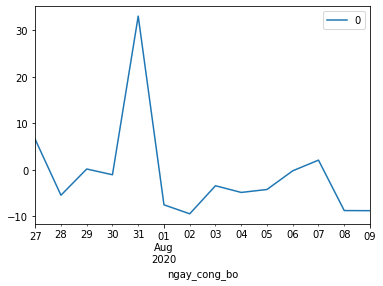

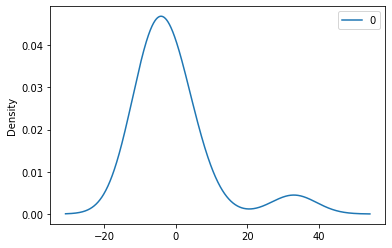

In [43]:
# plot residual errors
residuals = pd.DataFrame(fit_model.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [46]:
history = [x for x in train_data]
predictions = list()

for t in range(len(test_data)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=23.910667, expected=19.000000
predicted=15.108794, expected=4.000000
predicted=9.458861, expected=10.000000
predicted=6.218204, expected=13.000000
predicted=16.267882, expected=14.000000
predicted=9.963999, expected=15.000000


In [47]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_data, predictions)
print("Test MSE: %.3f" % error)

Test MSE: 37.385


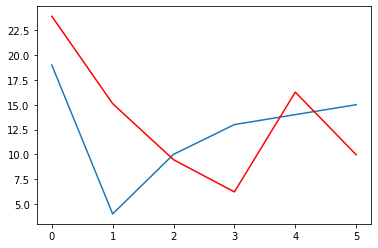

In [48]:
plt.plot(test_data.values)
plt.plot(predictions, color='red')

## Dự đoán số ca nhiễm Covid19 ở Đà Nẵng 10 ngày tiếp theo (15/8 - 24/8)

In [49]:
daily_confirmed_case_increase.iloc[:, 0].values

array([ 3, 11,  5,  8,  8, 45, 25, 16, 15, 23, 34, 20, 22, 15, 19,  4, 10,
       13, 14, 15], dtype=int64)

In [50]:
history = list(daily_confirmed_case_increase.iloc[:, 0].values)

for t in range(10):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(obs)

In [51]:
print("SỐ CA NHIỄM MỚI TẠI ĐÀ NẴNG TRONG 15 NGÀY TIẾP THEO: ")
print("---------------------------------------------------")
print(history)

SỐ CA NHIỄM MỚI TẠI ĐÀ NẴNG TRONG 15 NGÀY TIẾP THEO: 
---------------------------------------------------
[3, 11, 5, 8, 8, 45, 25, 16, 15, 23, 34, 20, 22, 15, 19, 4, 10, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]


# IV. NHÌN LẠI QUÁ TRÌNH LÀM ĐỒ ÁN

## 4.1 Đã gặp những khó khăn gì ?
- Gặp 1 số lỗi khó hiểu: chạy 2 lần tương tự nhau cho ra 2 kết quả khác nhau.
- Gặp lỗi khi training mô hình Neural Network, cụ thể là để các ma trận tham số tự động khởi tạo, dẫn đến mô hình đôi khi không học được (vì w khởi tạo toàn là 0)

## 4.2 Có học được gì hữu ích không ? 
- Tư duy logic, học được quy trình làm việc Data Science. 
- Học cách tư duy và xử lý dữ liệu (điền dữ liệu còn trống, lựa chọn các cột thích hợp,...).
- Thao tác với thư viện matplotlib, pandas thuần thục hơn.
- Học và tìm hiểu time series ARIMA.

## 4.3 Nếu có thêm thời gian thì sẽ làm gì ? 
- Xây dựng mô hình dự đoán Keras gồm nhiều biến số hơn. Từ đó nâng cao độ chính xác.
- Xây dựng mô hình ARIMA nhằm dự đoán số người nhiễm Covid19 ở Đà Nẵng hiệu quả hơn. 

## Link tham khảo: 

https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons"

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/